In [110]:

import import_ipynb
from tradedays import StockTradeDays
from strategy_1 import TradeStrategy1   
from trade_loopback import TradeLoopBack


importing Jupyter notebook from trade_loopback.ipynb


In [112]:
from abupy import ABuSymbolPd, EMarketDataSplitMode
# List 2 years of MasterCard closing price to list()
price_array = ABuSymbolPd.make_kl_df('MA', EMarketDataSplitMode.E_DATA_SPLIT_SE).close.tolist()
date_array = ABuSymbolPd.make_kl_df('MA', EMarketDataSplitMode.E_DATA_SPLIT_SE).date.tolist()
price_array[-5:], date_array[-5:]

([174.65, 186.43, 186.43, 186.43, 186.43],
 [20181224, 20181226, 20181227, 20181228, 20181231])

In [113]:
# Create Trade Days
trade_days = StockTradeDays(price_array, "", date_array)
print('trade_days has {} days'.format(len(trade_days)))
print('Last trading day: {}'.format(trade_days[-1]))

trade_days has 401 days
Last trading day: stock(date='20181231', price=186.43, change=0.0)


In [116]:
# Back Test Strategy
trade_loop_back = TradeLoopBack(trade_days, TradeStrategy1())
trade_loop_back.execute_trade()
print('TradeStrategy1 Total Profit: {}%'.format(
    reduce(lambda a, b: a + b, trade_loop_back.profit_array) * 100
))

TradeStrategy1 Total Profit: 6.5000000000000115%


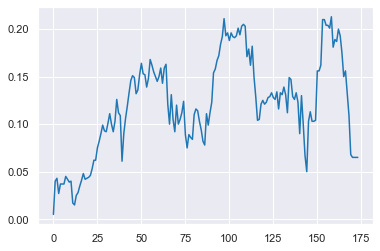

In [117]:
# Visulazation
import numpy as np
from matplotlib import pyplot
pyplot.plot(np.array(trade_loop_back.profit_array).cumsum())